# Projekt KNDS

**Import bibliotek**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import funkcji**

In [2]:
import dataAnalysis as dataAnalysis
import dataProcessing as dataProcessing
import regressionModel as regressionModel

**Import danych**

In [3]:
def getData(filePath):
    dataset = pd.read_csv(filePath)
    return dataset

def printData(data, rows):
    print(data.head(rows))


dataFilePath = '../Resources/Hotel_Reservations.csv'
data = getData(dataFilePath)

**Analiza zbioru**

  1. Analiza podstawowa

In [4]:
dataAnalysis.analyzeData(data)

Analyzing data...
Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-n

  2. Rozkłady zmiennych numerycznych

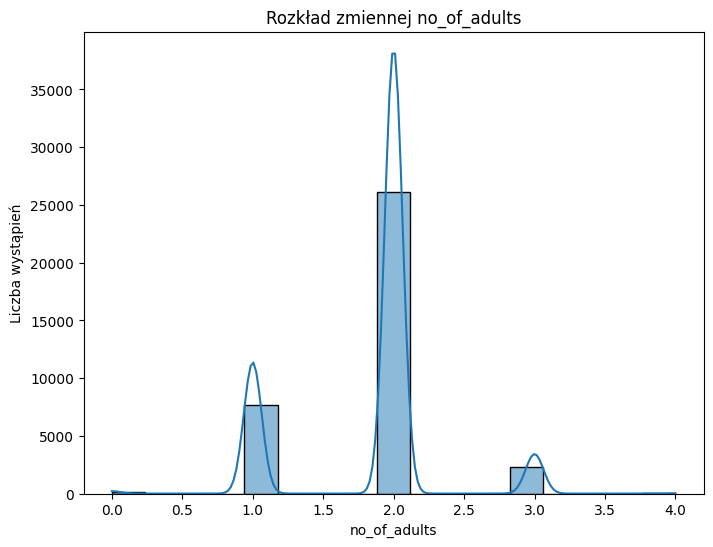

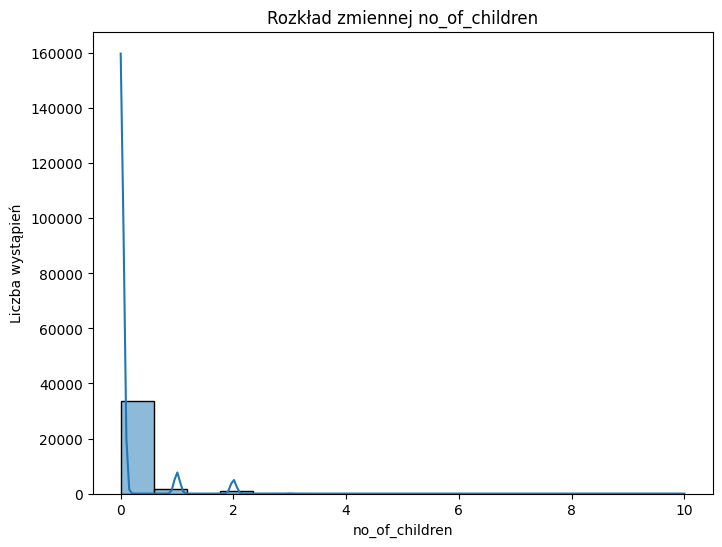

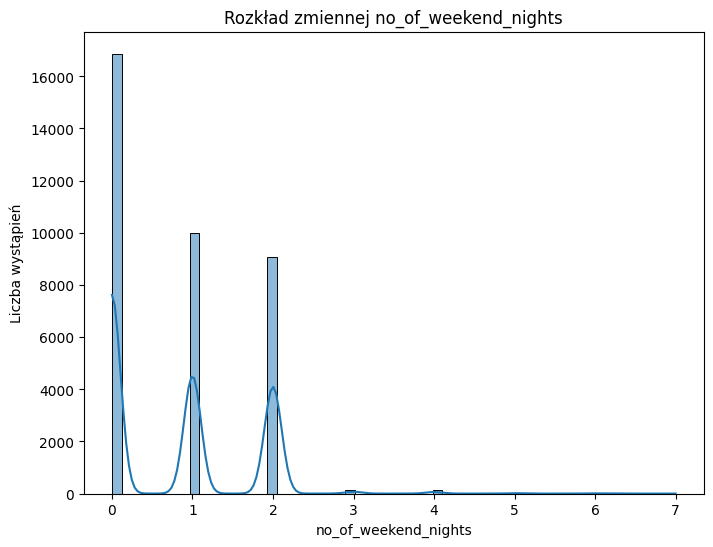

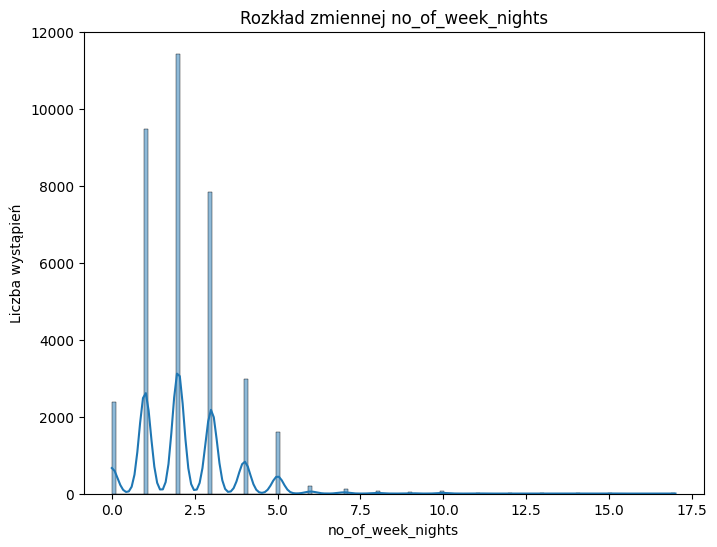

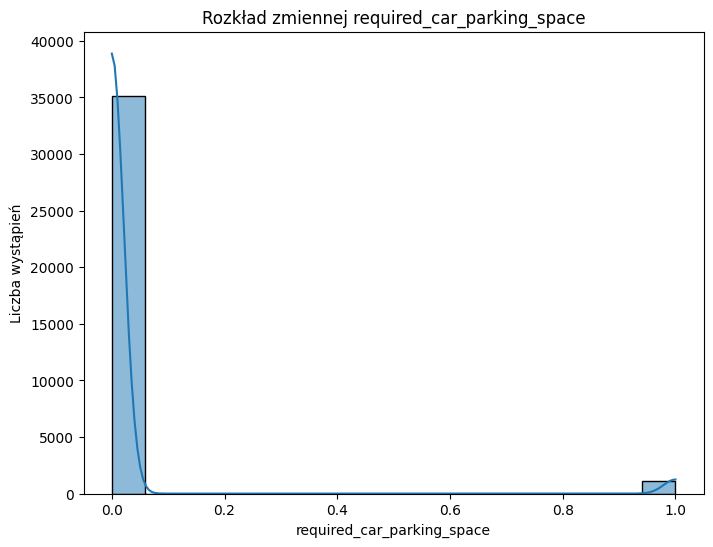

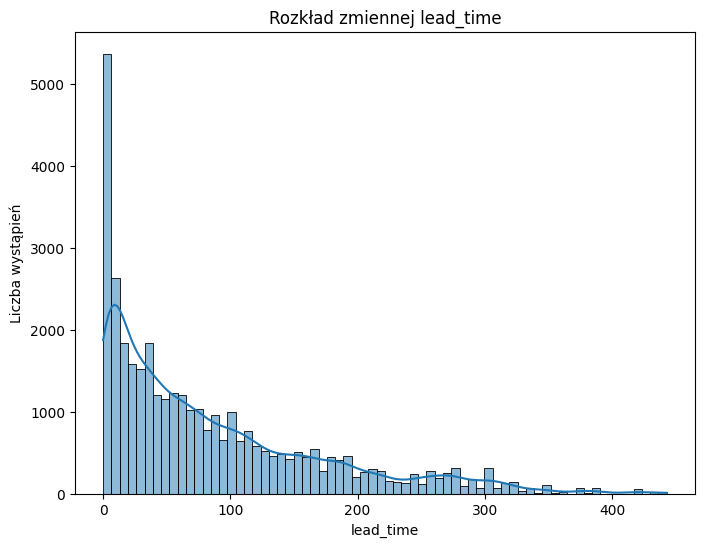

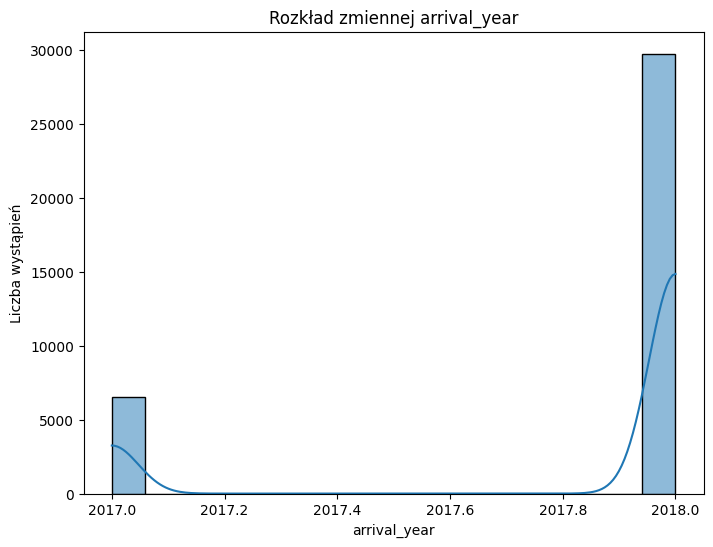

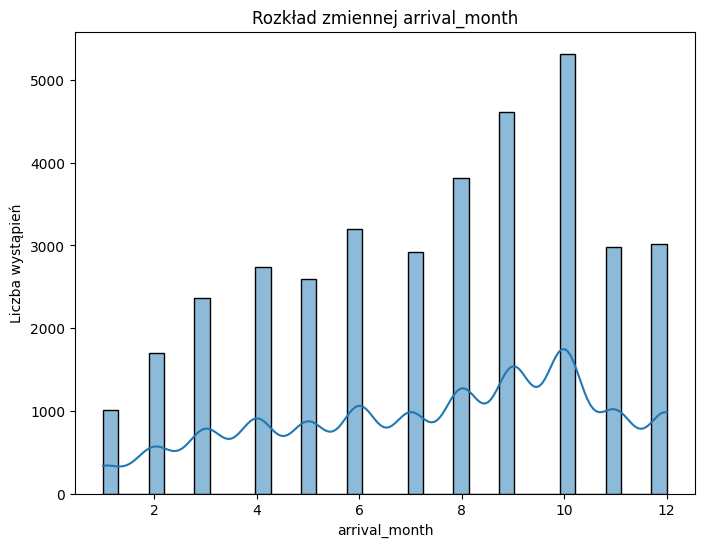

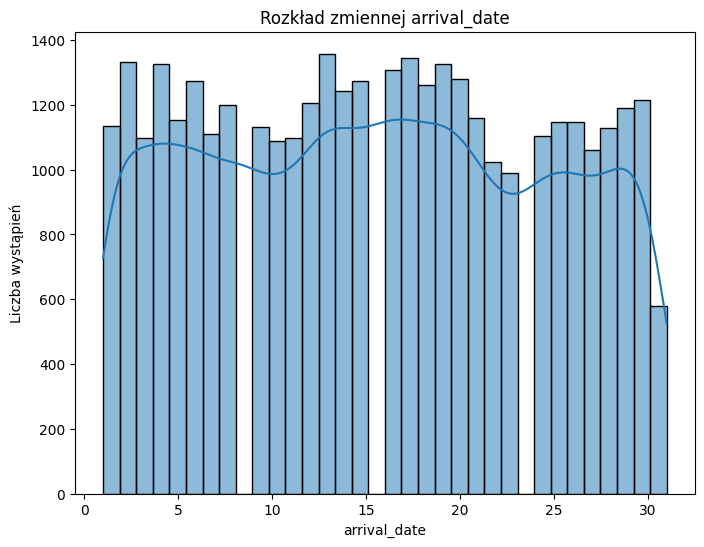

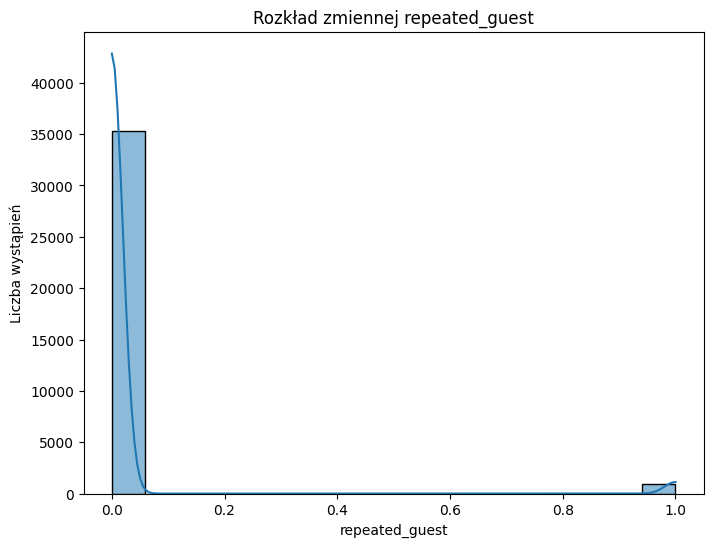

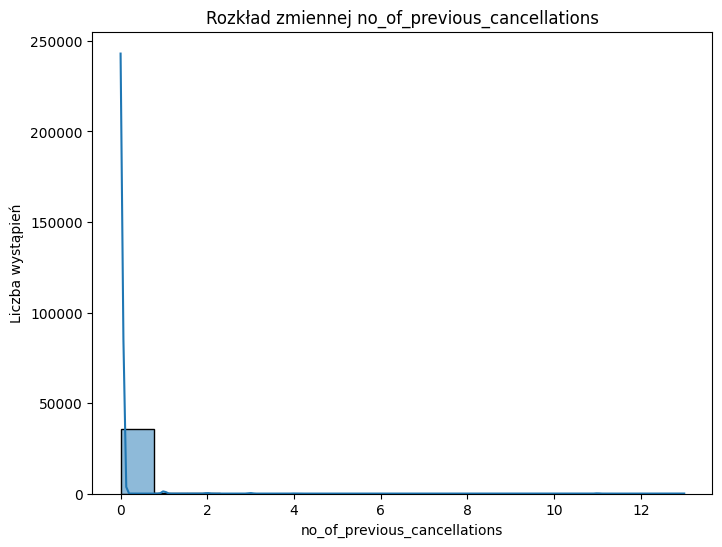

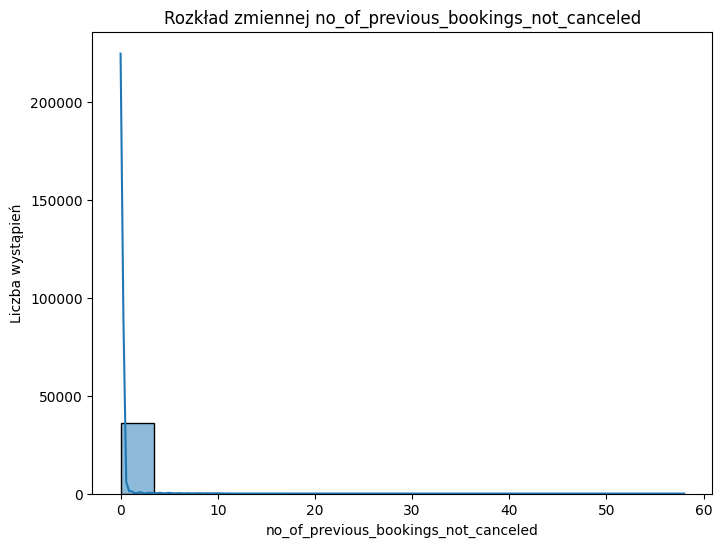

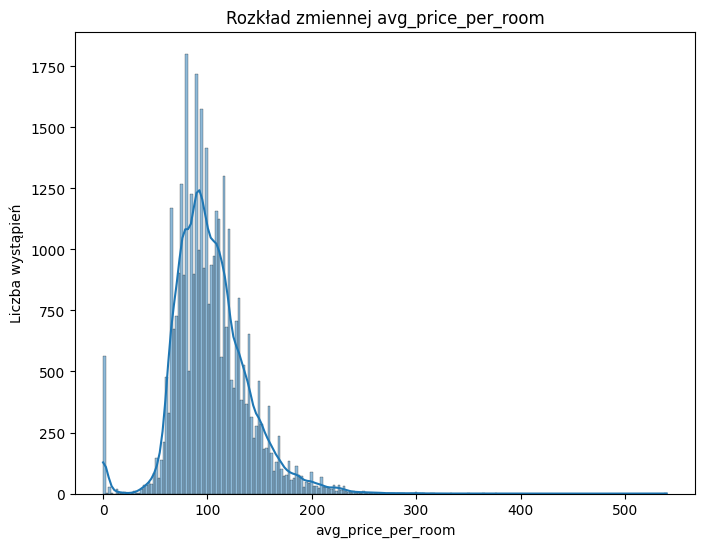

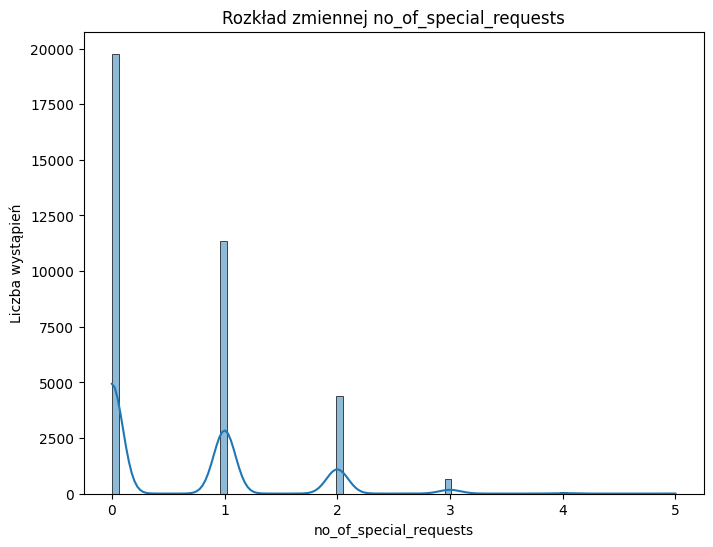

In [5]:
dataAnalysis.plotHist(data)

3. Rozkłady zmiennych kategorycznych

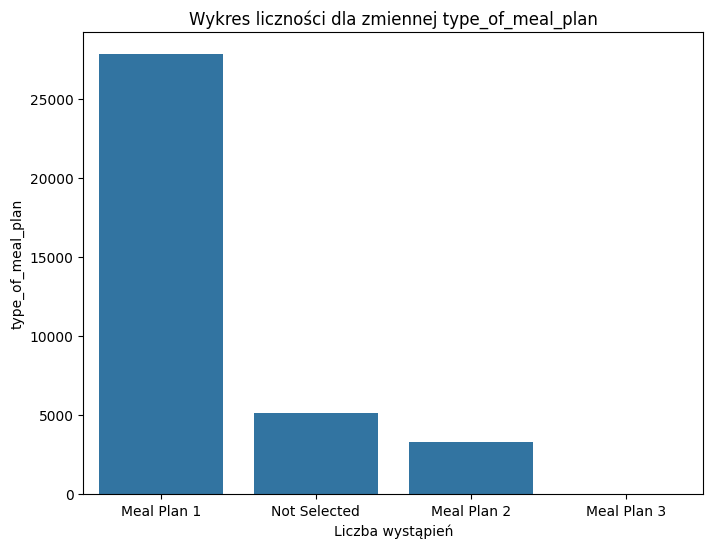

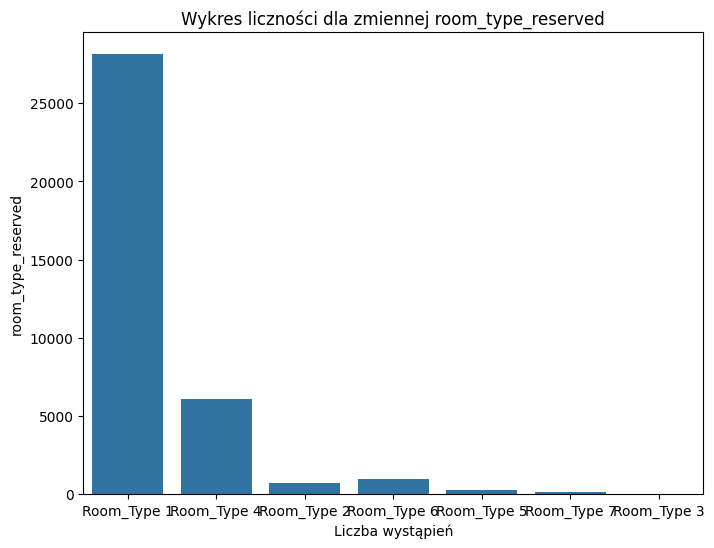

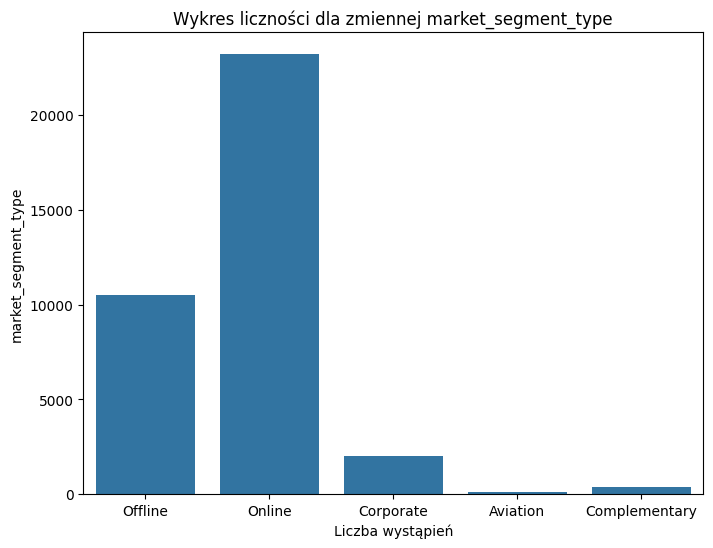

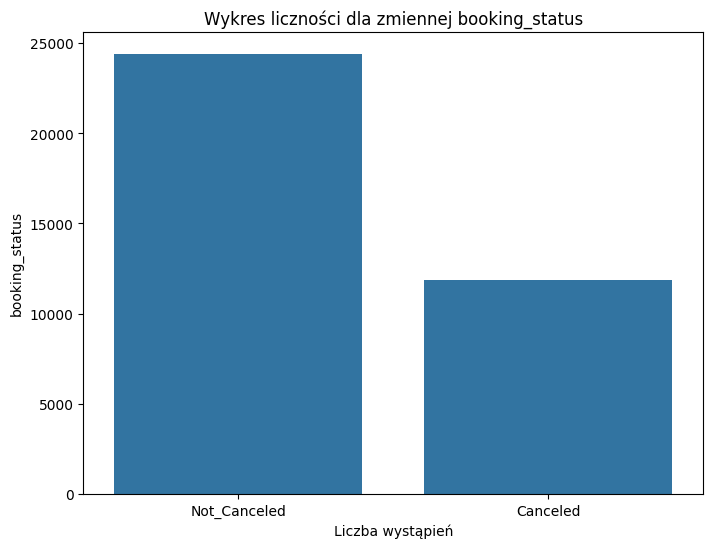

In [6]:
dataAnalysis.plotCounts(data)

  4. Analiza wartości odstających

In [7]:
dataAnalysis.startIQRAnalysis(data)

Number of outliers in no_of_adults:
 10167
Number of outliers in no_of_children:
 2698
Number of outliers in no_of_weekend_nights:
 21
Number of outliers in no_of_week_nights:
 324
Number of outliers in required_car_parking_space:
 1124
Number of outliers in lead_time:
 1331
Number of outliers in arrival_year:
 6514
Number of outliers in arrival_month:
 0
Number of outliers in arrival_date:
 0
Number of outliers in repeated_guest:
 930
Number of outliers in no_of_previous_cancellations:
 338
Number of outliers in no_of_previous_bookings_not_canceled:
 812
Number of outliers in avg_price_per_room:
 1696
Number of outliers in no_of_special_requests:
 761


  5. Wartości odstające - wykresy

  6. Współczynnik korealcji Pearsona

In [8]:
dataAnalysis.correlationCoefficient(data)

['no_of_adults', 'no_of_children', np.float64(-0.01978707355793209)]
['no_of_adults', 'no_of_weekend_nights', np.float64(0.10331577522391473)]
['no_of_adults', 'no_of_week_nights', np.float64(0.10562190100313681)]
['no_of_adults', 'required_car_parking_space', np.float64(0.011428744691347945)]
['no_of_adults', 'lead_time', np.float64(0.09728651035955285)]
['no_of_adults', 'arrival_year', np.float64(0.07671928950617037)]
['no_of_adults', 'arrival_month', np.float64(0.021841470547424004)]
['no_of_adults', 'arrival_date', np.float64(0.026337868434581937)]
['no_of_adults', 'repeated_guest', np.float64(-0.19227693931856774)]
['no_of_adults', 'no_of_previous_cancellations', np.float64(-0.04742574729059412)]
['no_of_adults', 'no_of_previous_bookings_not_canceled', np.float64(-0.11916579302273704)]
['no_of_adults', 'avg_price_per_room', np.float64(0.2968857360658217)]
['no_of_adults', 'no_of_special_requests', np.float64(0.1894009513721449)]
['no_of_children', 'no_of_weekend_nights', np.float6

  7. Korelacja zmiennych - wykresy

In [9]:
# dataAnalysis.plotScatterDiagrams(data)

  8. Zależności między kolumnami numerycznymi a zmienną celu

Target variable for box plots: booking_status


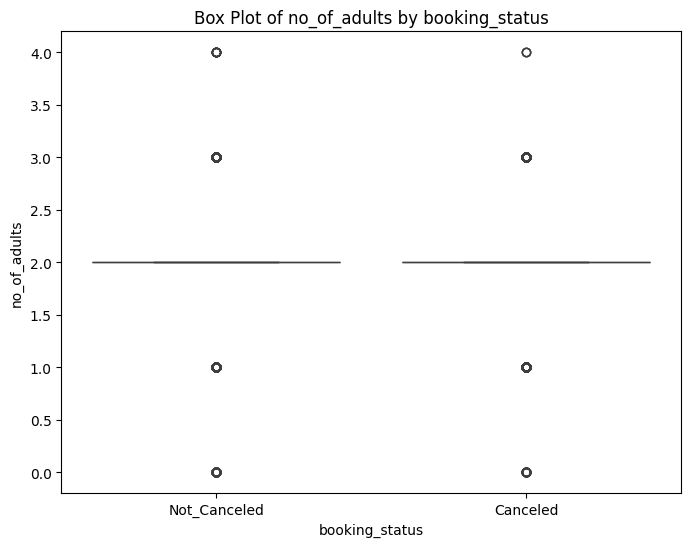

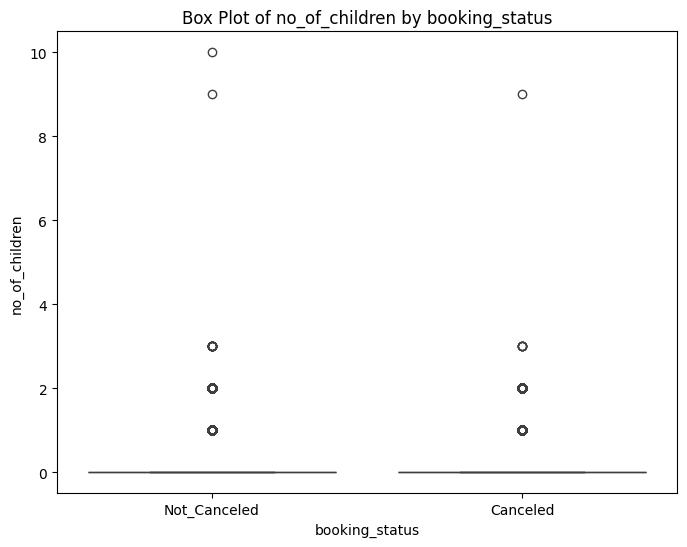

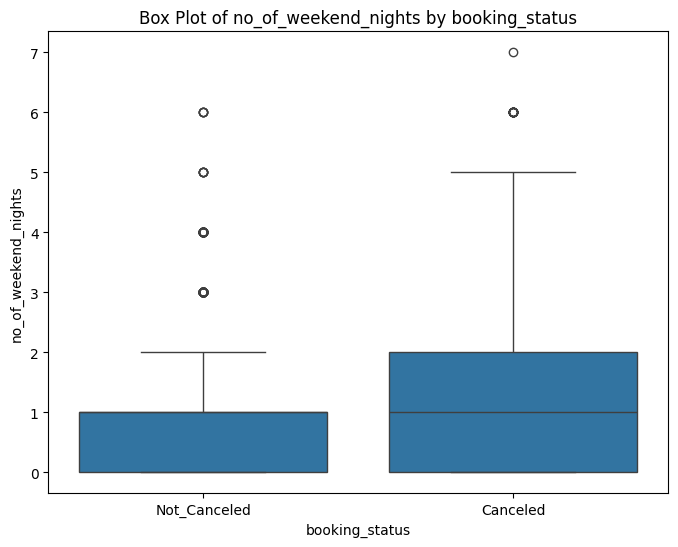

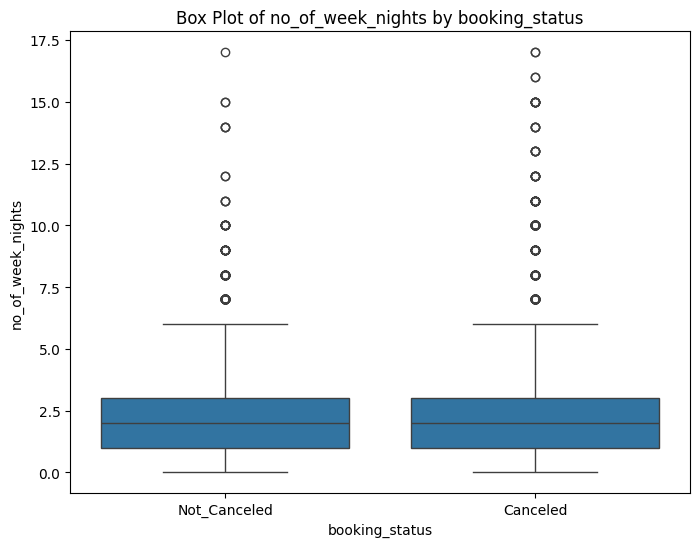

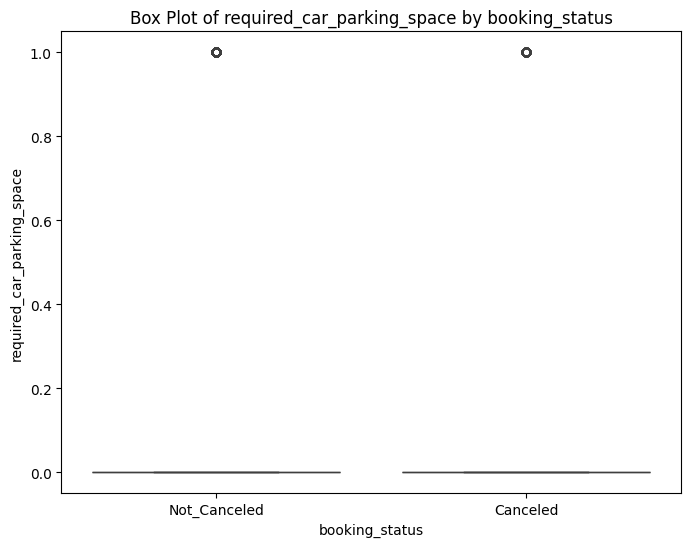

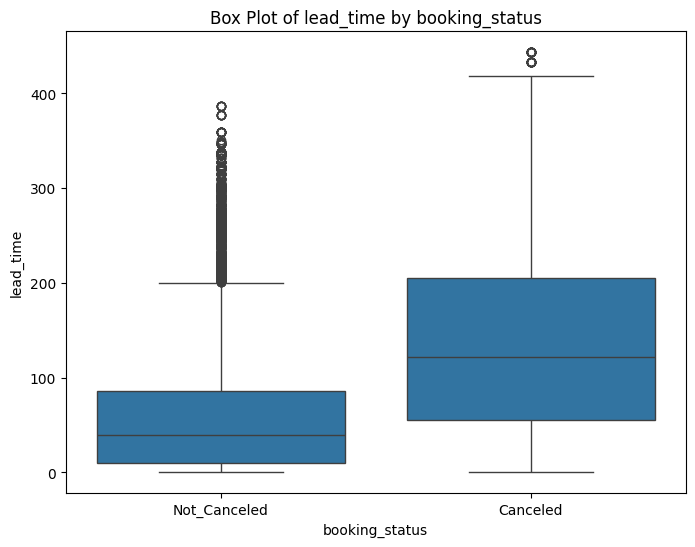

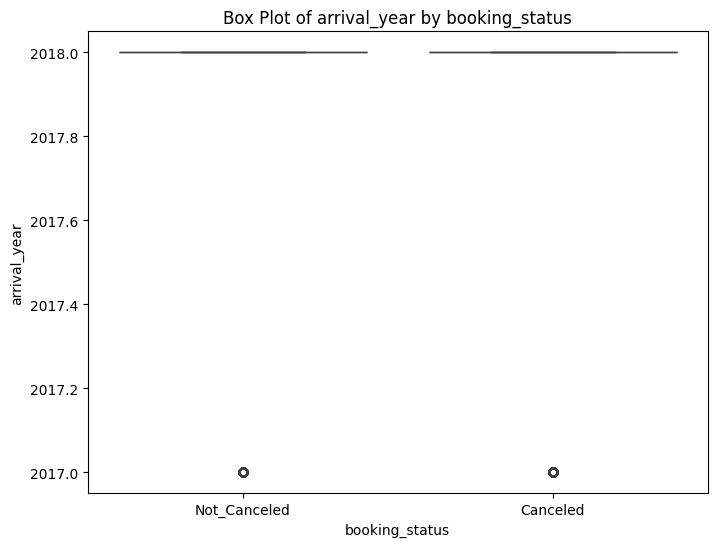

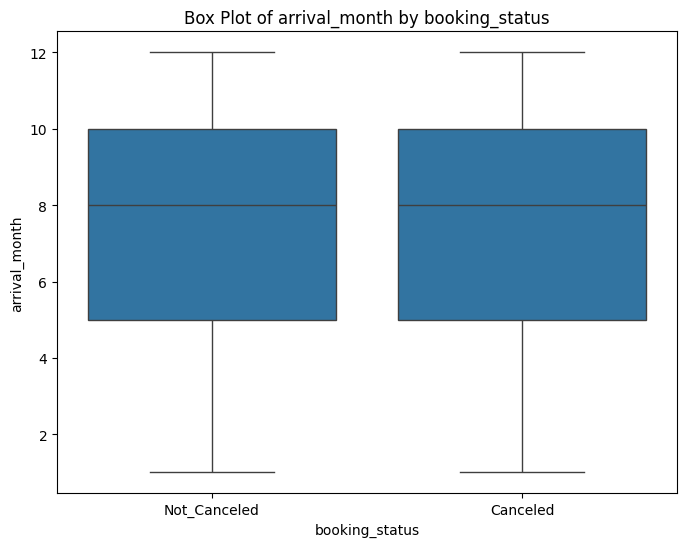

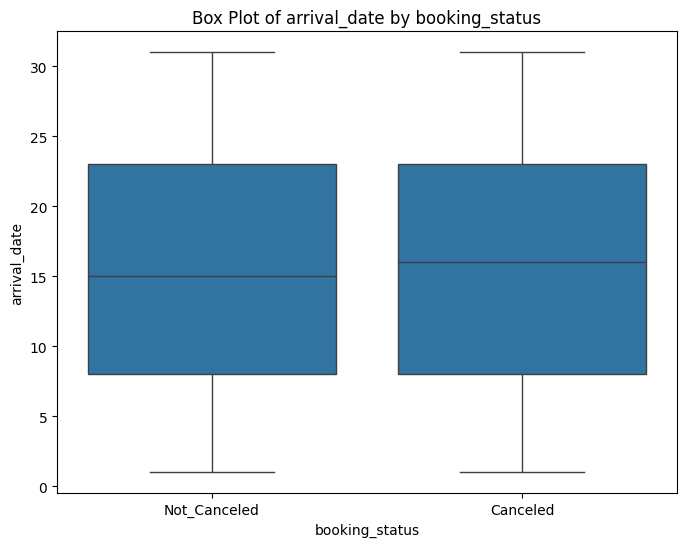

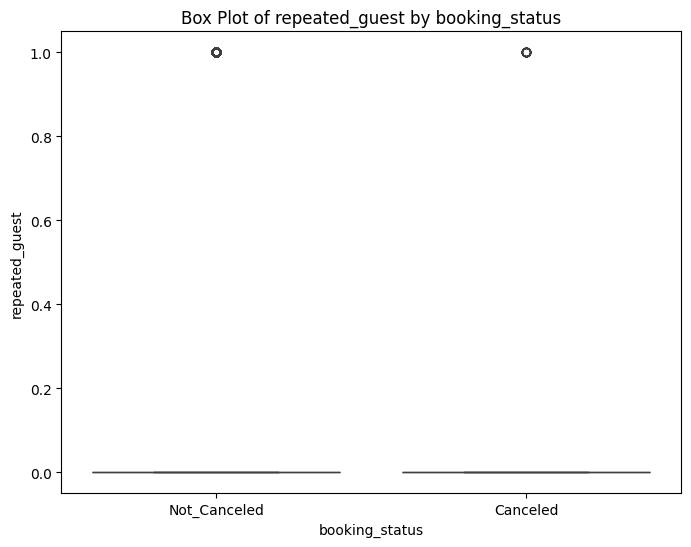

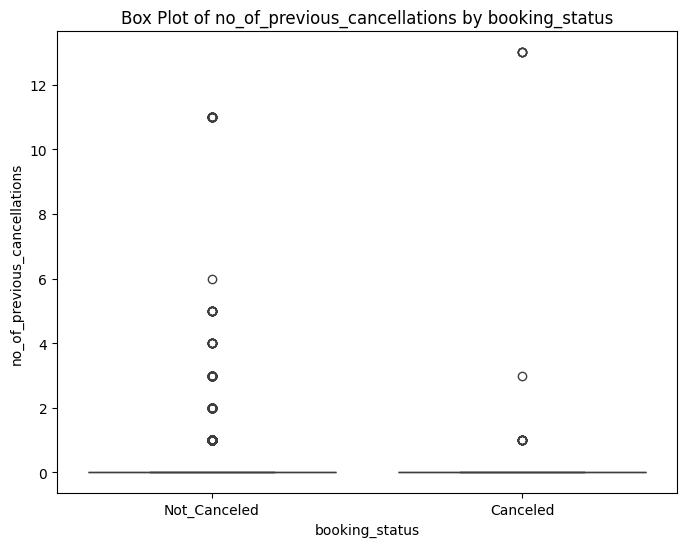

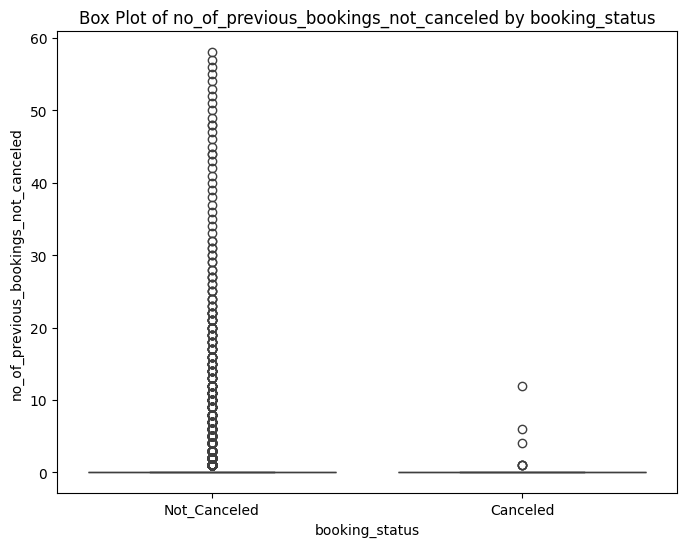

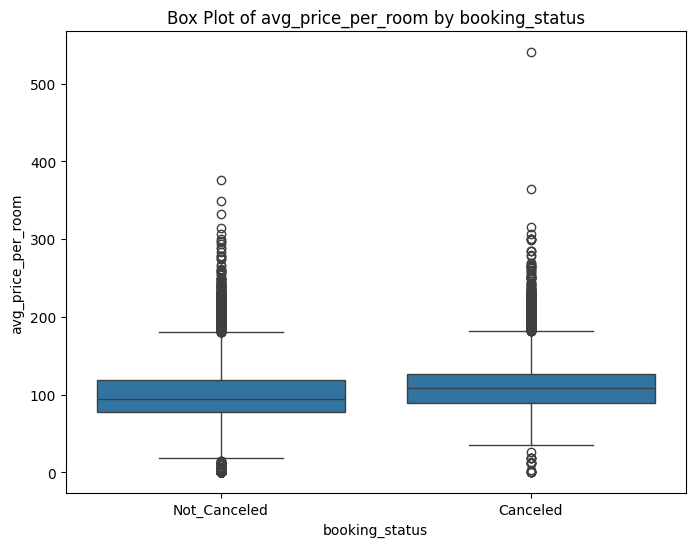

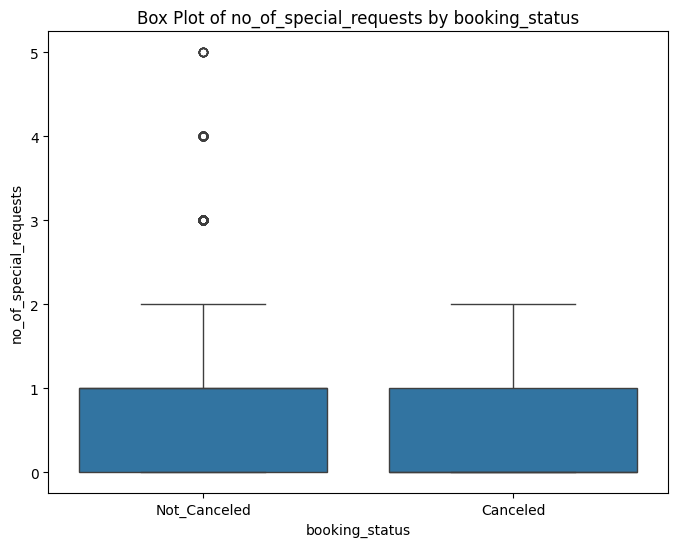

In [10]:
dataAnalysis.plotBoxDiagramsForTargetVar(data)

**Przetworzenie danych i przygotowanie zbiorów**

In [14]:
X_train_processed, X_test_processed, y_train, y_test = dataProcessing.processData(data)

Processing data...
Splitting data...
All feratures:  ['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
Numerical features:  ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
Categorical features:  ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
Processed training dataset:  <bound method NDFrame.head of        no_of_adults  no_of_children  no_of_weekend_nights  no_o

**Trening - Regresja Liniowa**

1. Model regresji liniowej

In [ ]:
regressionModel.linearRegressionTrain(X_train_processed, X_test_processed, y_train, y_test)

2. Model Lasso

In [ ]:
regressionModel.lassoRegressionTrain(X_train_processed, X_test_processed, y_train, y_test)

3. Model Ridge

In [ ]:
regressionModel.ridgeRegressionTrain(X_train_processed, X_test_processed, y_train, y_test)

**Trening - Drzewo decyzyjne**